<a href="https://colab.research.google.com/github/gomunamu/pdp/blob/main/reuters_multi_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)


2110848/2110848 [==============================] - 0s 0us/step


In [3]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decoded_newswire = " ".join(
    [reverse_word_index.get(i-3, "?") for i in train_data[0]]
)

550378/550378 [==============================] - 0s 0us/step


In [4]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [11]:
import tensorflow
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [14]:
from tensorflow import keras
from keras import layers
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax"),
])

In [15]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])


In [16]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [17]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 76ms/step - loss: 2.7232 - accuracy: 0.4803 - val_loss: 1.8646 - val_accuracy: 0.6190
Epoch 2/20
16/16 [==============================] - 1s 61ms/step - loss: 1.5625 - accuracy: 0.6725 - val_loss: 1.4052 - val_accuracy: 0.6780
Epoch 3/20
16/16 [==============================] - 1s 64ms/step - loss: 1.1858 - accuracy: 0.7444 - val_loss: 1.2052 - val_accuracy: 0.7230
Epoch 4/20
16/16 [==============================] - 1s 56ms/step - loss: 0.9628 - accuracy: 0.7923 - val_loss: 1.1118 - val_accuracy: 0.7590
Epoch 5/20
16/16 [==============================] - 1s 73ms/step - loss: 0.7974 - accuracy: 0.8301 - val_loss: 1.0201 - val_accuracy: 0.7720
Epoch 6/20
16/16 [==============================] - 2s 95ms/step - loss: 0.6601 - accuracy: 0.8566 - val_loss: 0.9605 - val_accuracy: 0.7950
Epoch 7/20
16/16 [==============================] - 1s 78ms/step - loss: 0.5498 - accuracy: 0.8817 - val_loss: 0.9130 - val_accuracy: 0.8080
Epoch 8/20
16

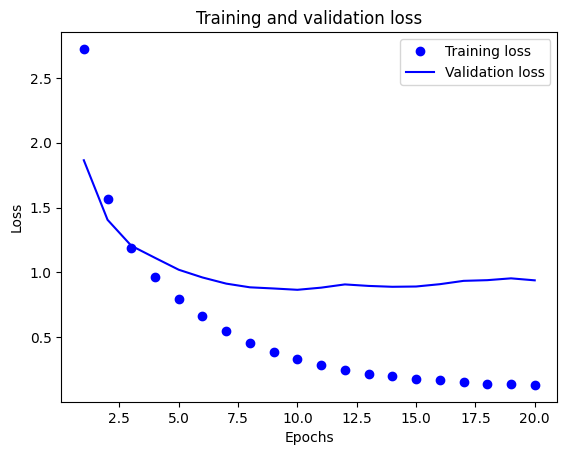

In [19]:
import matplotlib.pyplot as plt
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

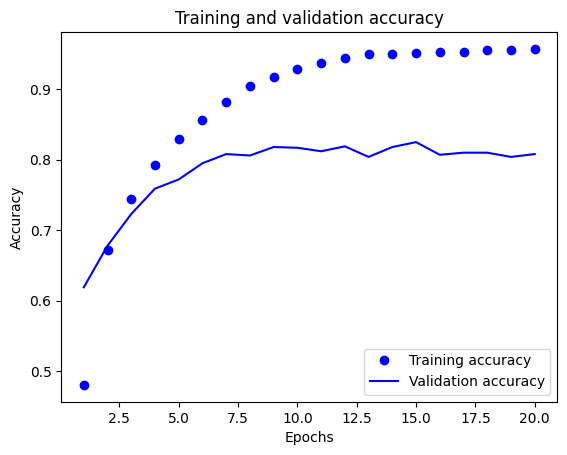

In [20]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [25]:
pred = model.predict(x_test)
print(pred)
print(y_test)

71/71 [==============================] - 1s 8ms/step
[[8.3097011e-06 3.0910578e-05 1.4314213e-08 ... 5.1919187e-07
  3.6600358e-07 1.4844677e-08]
 [2.2798817e-04 5.0578971e-04 2.1332542e-06 ... 5.5403552e-07
  6.3591365e-08 4.5140064e-06]
 [4.6544736e-03 9.1708118e-01 9.5312425e-04 ... 1.5574038e-05
  4.2487634e-05 4.1403055e-06]
 ...
 [3.3651679e-05 9.2453964e-05 1.4798869e-05 ... 1.8996165e-05
  1.7792345e-05 9.7011934e-07]
 [1.7587402e-03 9.1911433e-03 6.3039995e-05 ... 5.9268619e-05
  5.6943849e-05 2.5073568e-05]
 [5.5049796e-04 6.2810206e-01 2.8049103e-03 ... 2.7261774e-05
  3.0528146e-04 5.6018912e-06]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [30]:
score, acc = model.evaluate(x_test, y_test)


71/71 [==============================] - 0s 4ms/step - loss: 1.0584 - accuracy: 0.7916


In [29]:
print(result)

[1.0584362745285034, 0.7916295528411865]
